In [39]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras 
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [40]:
pip install tensorflow_hub

In [41]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

In [42]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [43]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


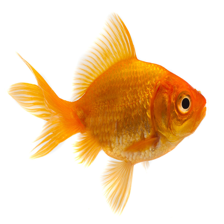

In [44]:
gold_fish = Image.open('/content/drive/MyDrive/Colab Notebooks/Goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [45]:
gold_fish = np.array(gold_fish)/255.0
gold_fish.shape

(224, 224, 3)

In [46]:
#gold_fish =np.array(gold_fish)/255.0  #we scale the image
gold_fish

array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]])

In [47]:
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [48]:
classifier.predict(gold_fish[np.newaxis, ...])

array([[ 0.19074059,  2.84679   ,  9.144733  , ..., -1.337282  ,
         0.6947851 ,  0.2522201 ]], dtype=float32)

In [49]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

(1, 1001)

In [50]:
result

array([[ 0.19074059,  2.84679   ,  9.144733  , ..., -1.337282  ,
         0.6947851 ,  0.2522201 ]], dtype=float32)

In [51]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [52]:
image_labels = []
with open("/content/drive/MyDrive/Colab Notebooks/ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [53]:
image_labels[predicted_label_index]

'goldfish'

In [55]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)

228818944/228813984 [==============================] - 3s 0us/step


In [56]:
data_dir

'./datasets/flower_photos'

In [58]:
import pathlib      #it onverts str path to windows path
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [59]:
list(data_dir.glob('*/*.jpg'))[:5] 

[PosixPath('datasets/flower_photos/sunflowers/16967372357_15b1b9a812_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/3514340206_efb8198a80_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/9699724719_a8439cc0fd_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/23247483352_0defc7a6dc_n.jpg'),
 PosixPath('datasets/flower_photos/sunflowers/58636535_bc53ef0a21_m.jpg')]

In [60]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count) 

3670


In [61]:
roses = list(data_dir.glob('*roses/*.jpg'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/6163179241_f093f45d95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg')]

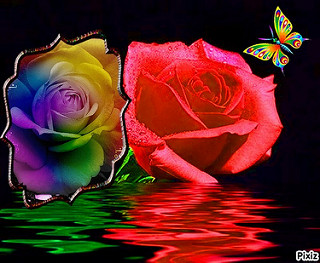

In [63]:
Image.open(str(roses[3]))

In [66]:
tulips = list(data_dir.glob('*tulips/*.jpg'))
tulips[:5]

[PosixPath('datasets/flower_photos/tulips/10995953955_089572caf0.jpg'),
 PosixPath('datasets/flower_photos/tulips/3502974120_9f1eceaf8b_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5635348214_a4e2b19ffe.jpg'),
 PosixPath('datasets/flower_photos/tulips/5012813078_99fb977616_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/14149603605_eedfe9678c_n.jpg')]

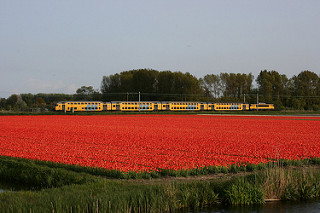

In [67]:
Image.open(str(tulips[3]))

In [68]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [69]:
flowers_images_dict['roses'] #It gives all the images

[PosixPath('datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5799616059_0ffda02e54.jpg'),
 PosixPath('datasets/flower_photos/roses/527513005_41497ca4dc.jpg'),
 PosixPath('datasets/flower_photos/roses/6163179241_f093f45d95_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2535466393_6556afeb2f_m.jpg'),
 PosixPath('datasets/flower_photos/roses/17090993740_fcc8b60b81.jpg'),
 PosixPath('datasets/flower_photos/roses/8642943283_47e44d049d_m.jpg'),
 PosixPath('datasets/flower_photos/roses/4797595918_79887b1229_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6950609394_c53b8c6ac0_m.jpg'),
 PosixPath('datasets/flower_photos/roses/15255964454_0a64eb67fa.jpg'),
 PosixPath('datasets/flower_photos/roses/18584002386_cec0df537d_n.jpg'),
 PosixPath('datasets/flower_photos/roses/5172171681_5934378f08.jpg'),
 PosixPath('datasets/flower_photos/roses/9159362388_c6f4cf3812_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2607130050_9c34310004.jpg'),
 P

In [70]:
flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [71]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/6864417932_36fa4ceecf_n.jpg'

In [72]:
img = cv2.imread(str(flowers_images_dict['roses'][0])) #imread means image read in opencv
img.shape

(252, 320, 3)

In [75]:
# Make image are same size before you train the model
X, y = [], []

for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(str(image))
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [78]:
X[0]

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [254, 254, 254],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[254, 254, 254],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [79]:
X = np.array(X)
y = np.array(y)

In [82]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [83]:
X_train_scaled = X_train/255
y_train_scaled = X_test/255

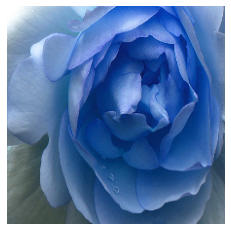

In [84]:
plt.axis('off')
plt.imshow(X[2])

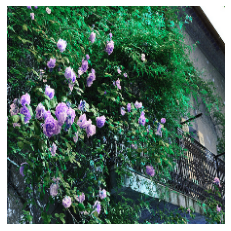

In [85]:
plt.axis('off')
plt.imshow(X[1])

In [86]:
predicted = classifier.predict(np.array([X[0],X[1],X[2]]))
predicted

array([[ 0.2216818 , -0.5638024 ,  2.0651534 , ..., -1.4705416 ,
        -0.90074   ,  3.9253118 ],
       [ 0.23605588, -0.18803385,  1.3130933 , ..., -1.36472   ,
        -1.40574   ,  3.1087267 ],
       [ 0.17369479, -0.38449222,  1.7120172 , ..., -1.0998839 ,
        -1.4970219 ,  3.0410728 ]], dtype=float32)

In [87]:
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 795, 795])

In [88]:
image_labels[795]

'shower curtain'

### bold text Now take pre-trained model and retrain it using floweers images

In [89]:
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [90]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_2 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense (Dense)                (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:

model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5
86/86 [==============================] - 7s 39ms/step - loss: 0.8975 - acc: 0.6726
Epoch 2/5
86/86 [==============================] - 3s 39ms/step - loss: 0.4398 - acc: 0.8401
Epoch 3/5
86/86 [==============================] - 3s 39ms/step - loss: 0.3384 - acc: 0.8892
Epoch 4/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2835 - acc: 0.9084
Epoch 5/5
86/86 [==============================] - 3s 39ms/step - loss: 0.2478 - acc: 0.9222


In [93]:
X_test_scaled = model.predict(X_test)